In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv(r'C:\Users\91708\Downloads\Train_Data.csv')
df = pd.read_csv(r'C:\Users\91708\Downloads\Test_Data.csv')
df.head()

,text,author,controversiality,parent_text,parent_score,parent_votes,parent_author,parent_controversiality
0,Big deal. He once fought in the Napoleonic war...,['RecQuery'],0,Big deal. He was once shot with three arrows a...,438,438,illchopyourfaceoff,0
1,"I don't think the animal cares, either way, it...",['N4N4KI'],0,Animal cruelty is not a joke. It is not the s...,38,38,0_o,0
2,&GT; IT'S FAIRLY OBVIOUS YOU HAVE AN AGENDA HE...,['cometparty'],0,&gt;**You people** have time and time again sh...,16,16,[deleted],0
3,It's probably due to their skin looking supple...,['[deleted]'],0,I like women who are either naturally tan or a...,902,902,[deleted],0
4,kendrick lamar. he's like a poverty lupe fiasc...,['purrppassion'],0,who has the most overrated discography in hip ...,33,33,mr2good4you,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   text                     1015 non-null   object
 1   author                   1015 non-null   object
 2   controversiality         1015 non-null   int64 
 3   parent_text              1015 non-null   object
 4   parent_score             1015 non-null   int64 
 5   parent_votes             1015 non-null   int64 
 6   parent_author            1015 non-null   object
 7   parent_controversiality  1015 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 63.6+ KB


In [55]:
df['parent_controversiality'].value_counts()

0    1015
Name: parent_controversiality, dtype: int64

In [56]:
df['parent_score'].value_counts()

8      24
13     19
10     19
7      19
3      19
       ..
645     1
430     1
516     1
199     1
765     1
Name: parent_score, Length: 436, dtype: int64

In [57]:
df['parent_votes'].value_counts()

8      24
13     19
10     19
7      19
3      19
       ..
645     1
430     1
516     1
199     1
765     1
Name: parent_votes, Length: 436, dtype: int64

- parent_score and parent_votes both are same column so drop 'parent_score'
- Drop unnecessary column

In [58]:
df = df.drop(['parent_score'], axis=1)
df.head()

,text,author,controversiality,parent_text,parent_votes,parent_author,parent_controversiality
0,Big deal. He once fought in the Napoleonic war...,['RecQuery'],0,Big deal. He was once shot with three arrows a...,438,illchopyourfaceoff,0
1,"I don't think the animal cares, either way, it...",['N4N4KI'],0,Animal cruelty is not a joke. It is not the s...,38,0_o,0
2,&GT; IT'S FAIRLY OBVIOUS YOU HAVE AN AGENDA HE...,['cometparty'],0,&gt;**You people** have time and time again sh...,16,[deleted],0
3,It's probably due to their skin looking supple...,['[deleted]'],0,I like women who are either naturally tan or a...,902,[deleted],0
4,kendrick lamar. he's like a poverty lupe fiasc...,['purrppassion'],0,who has the most overrated discography in hip ...,33,mr2good4you,0


In [59]:
df['controversiality'].value_counts()

0    1013
1       2
Name: controversiality, dtype: int64

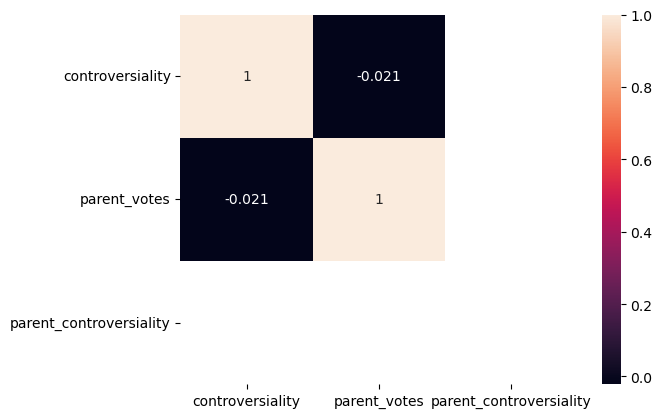

In [60]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [61]:
# Transfer category values to be lowercased & remove leading and trailing whitespaces
categorical_cols = ['text','author','parent_text','parent_author']
for col in df[categorical_cols]:
    df[col] = df[col].str.lower()
    df[col] = df[col].str.strip()
df.head()

,text,author,controversiality,parent_text,parent_votes,parent_author,parent_controversiality
0,big deal. he once fought in the napoleonic war...,['recquery'],0,big deal. he was once shot with three arrows a...,438,illchopyourfaceoff,0
1,"i don't think the animal cares, either way, it...",['n4n4ki'],0,animal cruelty is not a joke. it is not the s...,38,0_o,0
2,&gt; it's fairly obvious you have an agenda he...,['cometparty'],0,&gt;**you people** have time and time again sh...,16,[deleted],0
3,it's probably due to their skin looking supple...,['[deleted]'],0,i like women who are either naturally tan or a...,902,[deleted],0
4,kendrick lamar. he's like a poverty lupe fiasc...,['purrppassion'],0,who has the most overrated discography in hip ...,33,mr2good4you,0


### Remove all punctuations

In [62]:
import string
eng_punct= string.punctuation
eng_punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
for col in df[categorical_cols]:
    df[col] = df[col].apply(lambda x:''.join([i for i in x if i not in eng_punct]))
df.head()

,text,author,controversiality,parent_text,parent_votes,parent_author,parent_controversiality
0,big deal he once fought in the napoleonic wars...,recquery,0,big deal he was once shot with three arrows an...,438,illchopyourfaceoff,0
1,i dont think the animal cares either way its dead,n4n4ki,0,animal cruelty is not a joke it is not the sa...,38,0o,0
2,gt its fairly obvious you have an agenda here\...,cometparty,0,gtyou people have time and time again shown yo...,16,deleted,0
3,its probably due to their skin looking supple ...,deleted,0,i like women who are either naturally tan or a...,902,deleted,0
4,kendrick lamar hes like a poverty lupe fiasco ...,purrppassion,0,who has the most overrated discography in hip hop,33,mr2good4you,0


In [64]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91708\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91708\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [65]:
def text_tokens(row):
    text = row['text']
    tokens = word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words
df['text_tokens'] = df.apply(text_tokens, axis=1)

def parent_text_tokens(row):
    parent_text = row['parent_text']
    tokens = word_tokenize(parent_text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words
df['parent_text_tokens'] = df.apply(parent_text_tokens, axis=1)

df.head()

,text,author,controversiality,parent_text,parent_votes,parent_author,parent_controversiality,text_tokens,parent_text_tokens
0,big deal he once fought in the napoleonic wars...,recquery,0,big deal he was once shot with three arrows an...,438,illchopyourfaceoff,0,"[big, deal, he, once, fought, in, the, napoleo...","[big, deal, he, was, once, shot, with, three, ..."
1,i dont think the animal cares either way its dead,n4n4ki,0,animal cruelty is not a joke it is not the sa...,38,0o,0,"[i, dont, think, the, animal, cares, either, w...","[animal, cruelty, is, not, a, joke, it, is, no..."
2,gt its fairly obvious you have an agenda here\...,cometparty,0,gtyou people have time and time again shown yo...,16,deleted,0,"[gt, its, fairly, obvious, you, have, an, agen...","[gtyou, people, have, time, and, time, again, ..."
3,its probably due to their skin looking supple ...,deleted,0,i like women who are either naturally tan or a...,902,deleted,0,"[its, probably, due, to, their, skin, looking,...","[i, like, women, who, are, either, naturally, ..."
4,kendrick lamar hes like a poverty lupe fiasco ...,purrppassion,0,who has the most overrated discography in hip hop,33,mr2good4you,0,"[kendrick, lamar, hes, like, a, poverty, lupe,...","[who, has, the, most, overrated, discography, ..."


#### stop word removal

In [66]:
stop_words = stopwords.words('english')

tokens_cols = ['text_tokens','parent_text_tokens']

for col in tokens_cols:
    df[col] = df[col].apply(lambda x: ' '.join([w for w in x if w not in (stop_words)]))
df.head()

,text,author,controversiality,parent_text,parent_votes,parent_author,parent_controversiality,text_tokens,parent_text_tokens
0,big deal he once fought in the napoleonic wars...,recquery,0,big deal he was once shot with three arrows an...,438,illchopyourfaceoff,0,big deal fought napoleonic wars practically im...,big deal shot three arrows kept defending midg...
1,i dont think the animal cares either way its dead,n4n4ki,0,animal cruelty is not a joke it is not the sa...,38,0o,0,dont think animal cares either way dead,animal cruelty joke kill something intent eat ...
2,gt its fairly obvious you have an agenda here\...,cometparty,0,gtyou people have time and time again shown yo...,16,deleted,0,gt fairly obvious agenda right agenda prevent ...,gtyou people time time shown confused parties ...
3,its probably due to their skin looking supple ...,deleted,0,i like women who are either naturally tan or a...,902,deleted,0,probably due skin looking supple like tanned l...,like women either naturally tan really pale so...
4,kendrick lamar hes like a poverty lupe fiasco ...,purrppassion,0,who has the most overrated discography in hip hop,33,mr2good4you,0,kendrick lamar hes like poverty lupe fiasco be...,overrated discography hip hop


#### normalization - lemmatizing

In [67]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91708\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [68]:

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmatize_function = lambda x: [lemmatizer.lemmatize(str(word)) for word in x.split()]

for col in tokens_cols:
    df[col] = df[col].apply(lemmatize_function)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91708\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,author,controversiality,parent_text,parent_votes,parent_author,parent_controversiality,text_tokens,parent_text_tokens
0,big deal he once fought in the napoleonic wars...,recquery,0,big deal he was once shot with three arrows an...,438,illchopyourfaceoff,0,"[big, deal, fought, napoleonic, war, practical...","[big, deal, shot, three, arrow, kept, defendin..."
1,i dont think the animal cares either way its dead,n4n4ki,0,animal cruelty is not a joke it is not the sa...,38,0o,0,"[dont, think, animal, care, either, way, dead]","[animal, cruelty, joke, kill, something, inten..."
2,gt its fairly obvious you have an agenda here\...,cometparty,0,gtyou people have time and time again shown yo...,16,deleted,0,"[gt, fairly, obvious, agenda, right, agenda, p...","[gtyou, people, time, time, shown, confused, p..."
3,its probably due to their skin looking supple ...,deleted,0,i like women who are either naturally tan or a...,902,deleted,0,"[probably, due, skin, looking, supple, like, t...","[like, woman, either, naturally, tan, really, ..."
4,kendrick lamar hes like a poverty lupe fiasco ...,purrppassion,0,who has the most overrated discography in hip hop,33,mr2good4you,0,"[kendrick, lamar, he, like, poverty, lupe, fia...","[overrated, discography, hip, hop]"


In [69]:
df['text']= df['text_tokens'].apply(lambda x: ' '.join(x))
df['parent_text']= df['parent_text_tokens'].apply(lambda x: ' '.join(x))
df.drop(['text_tokens', 'parent_text_tokens'], axis=1, inplace= True)

df.head()


,text,author,controversiality,parent_text,parent_votes,parent_author,parent_controversiality
0,big deal fought napoleonic war practically imm...,recquery,0,big deal shot three arrow kept defending midge...,438,illchopyourfaceoff,0
1,dont think animal care either way dead,n4n4ki,0,animal cruelty joke kill something intent eat ...,38,0o,0
2,gt fairly obvious agenda right agenda prevent ...,cometparty,0,gtyou people time time shown confused party al...,16,deleted,0
3,probably due skin looking supple like tanned l...,deleted,0,like woman either naturally tan really pale so...,902,deleted,0
4,kendrick lamar he like poverty lupe fiasco bet...,purrppassion,0,overrated discography hip hop,33,mr2good4you,0


#### Vectorize

In [70]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer()
text = vectorizer.fit_transform(df['text']).toarray()
text = pd.DataFrame(text, columns=vectorizer.get_feature_names())

text.shape

C:\Users\91708\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(1015, 5230)

In [71]:
vectorizer1 = TfidfVectorizer(max_features=50,min_df=1,max_df=0.7)
text_tf_idf = vectorizer1.fit_transform(df['text']).toarray()
text_tf_idf = pd.DataFrame(text_tf_idf, columns=vectorizer1.get_feature_names())

text_tf_idf.shape

C:\Users\91708\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(1015, 50)

In [72]:
df.head()

,text,author,controversiality,parent_text,parent_votes,parent_author,parent_controversiality
0,big deal fought napoleonic war practically imm...,recquery,0,big deal shot three arrow kept defending midge...,438,illchopyourfaceoff,0
1,dont think animal care either way dead,n4n4ki,0,animal cruelty joke kill something intent eat ...,38,0o,0
2,gt fairly obvious agenda right agenda prevent ...,cometparty,0,gtyou people time time shown confused party al...,16,deleted,0
3,probably due skin looking supple like tanned l...,deleted,0,like woman either naturally tan really pale so...,902,deleted,0
4,kendrick lamar he like poverty lupe fiasco bet...,purrppassion,0,overrated discography hip hop,33,mr2good4you,0


In [73]:
num_cols = df[['controversiality', 'parent_votes', 'parent_controversiality']]

In [78]:
x = pd.concat([text_tf_idf,num_cols], axis=1)
y = df['parent_votes']

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [81]:
lr.fit(x_train, y_train)

LinearRegression()

In [82]:
y_pred = lr.predict(x_test)
y_pred

array([ 1.550e+02,  3.700e+02,  8.600e+01,  2.940e+02,  3.080e+02,
        3.800e+01,  5.300e+01,  2.290e+02,  4.900e+01,  1.500e+01,
        3.200e+01,  1.300e+01,  1.231e+03,  3.700e+02,  1.670e+02,
        2.570e+02,  4.430e+02,  7.000e+00,  1.720e+02,  1.940e+02,
        1.300e+01,  6.000e+00,  4.800e+01,  1.010e+02,  7.000e+01,
        3.490e+02,  1.128e+03,  9.000e+00,  1.300e+01,  3.100e+01,
        1.300e+01,  3.500e+01,  5.020e+02,  1.455e+03,  3.530e+02,
        2.000e+01,  3.500e+01,  1.110e+02,  4.300e+01,  5.600e+01,
        1.400e+01,  9.490e+02,  3.600e+01,  9.000e+00,  1.060e+02,
        8.000e+00,  2.210e+02,  4.800e+02,  2.800e+01,  1.281e+03,
       -8.000e+00,  1.270e+02,  1.600e+01,  4.020e+02,  1.540e+02,
        3.200e+01,  1.600e+01,  2.380e+02,  6.500e+01,  1.330e+02,
        2.390e+02,  3.000e+01,  5.660e+02,  1.700e+01,  1.000e+01,
        1.190e+02,  2.110e+02,  3.670e+02,  6.640e+02,  1.700e+01,
        7.650e+02,  2.260e+02,  1.400e+01,  1.670e+02,  2.610e

In [83]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
accuracy

1.0

- 100% accuracy